Python 3.11.0

In [1]:
%pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier



## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [3]:
name = 'Diego Gerwig López'
email = 'diegogerwig@gmail.com'

print(f'Nombre: {name}')
print(f'Email: {email}')


Nombre: Diego Gerwig López
Email: diegogerwig@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [4]:
# Cargar el dataset "titanic" de seaborn
df = sns.load_dataset("titanic")

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [6]:
# Remove 'deck' column
df = df.drop('deck', axis=1)

# Replace null values in 'age' with the mean
df['age'] = df['age'].fillna(df['age'].mean())

# Show the modified dataframe
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

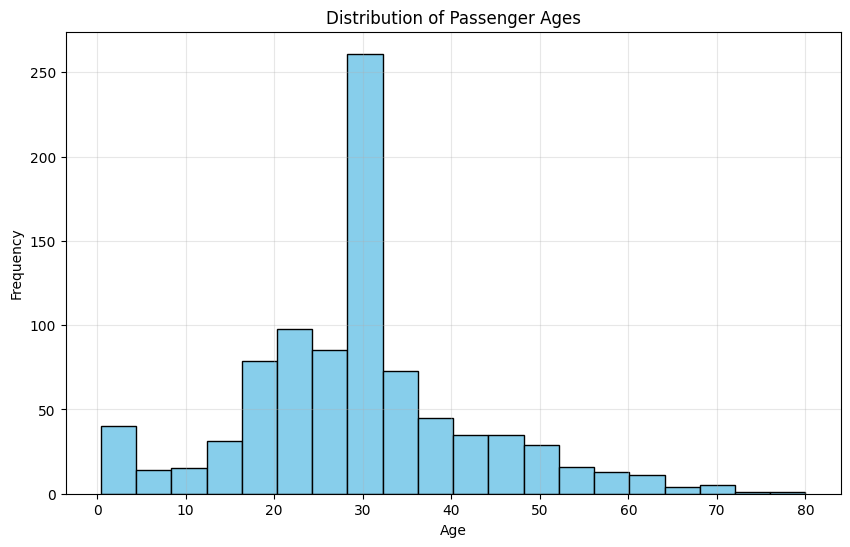

In [7]:
# Create a histogram for age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

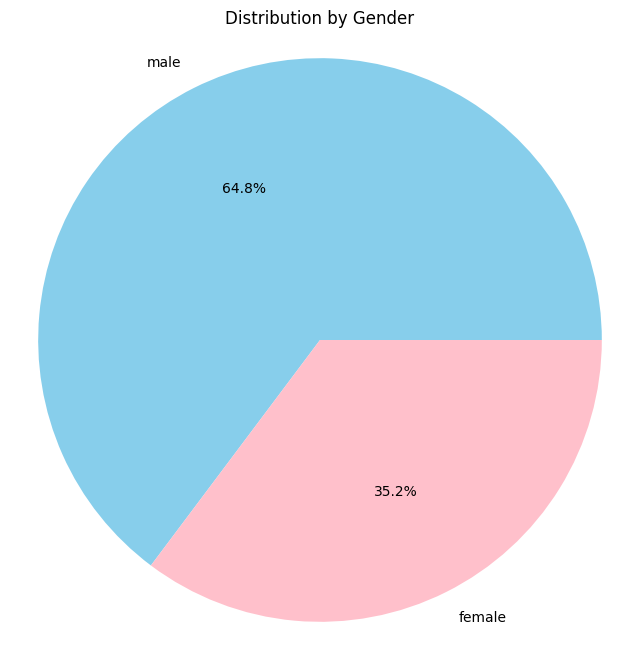

In [8]:
# Count gender distribution
gender_count = df['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Distribution by Gender')
plt.axis('equal')
plt.show()


## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [9]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Separate into x and y variables
x = diamantes[['depth', 'table', 'price', 'x', 'y', 'z']]
y = diamantes['carat']

# Verify the variables
print("Features (x):")
print(x.head())
print("\nTarget (y):")
print(y.head())


Features (x):
   depth  table  price     x     y     z
0   61.5   55.0    326  3.95  3.98  2.43
1   59.8   61.0    326  3.89  3.84  2.31
2   56.9   65.0    327  4.05  4.07  2.31
3   62.4   58.0    334  4.20  4.23  2.63
4   63.3   58.0    335  4.34  4.35  2.75

Target (y):
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64


#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [10]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Verify the shape of the splits
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (32364, 6)
x_test shape: (21576, 6)
y_train shape: (32364,)
y_test shape: (21576,)


#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [11]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Show model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [1.83553628e-02 4.37885137e-03 3.24803939e-05 3.00417037e-01
 8.60095293e-03 7.48562691e-04]
Model Intercept: -2.4886874780397314


#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

In [12]:
# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Show some predictions vs actual values
results = pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_pred[:10]})
results['Difference'] = results['Actual'] - results['Predicted']
results


R² Score: 0.9705


,Actual,Predicted,Difference
1388,0.24,0.143461,0.096539
50052,0.58,0.617044,-0.037044
41645,0.40,0.405190,-0.005190
42377,0.43,0.441609,-0.011609
17244,1.55,1.421778,0.128222
1608,1.00,0.948672,0.051328
46398,0.51,0.534453,-0.024453
45493,0.52,0.549293,-0.029293
49385,0.62,0.665909,-0.045909
10460,1.14,1.125109,0.014891


### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ALTERNATIVA CON OTRO DATASET 
# Cargar el dataset "titanic" de seaborn
# df = sns.load_dataset("titanic")

X.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [14]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (341, 30)
X_test shape: (228, 30)
y_train shape: (341,)
y_test shape: (228,)


#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [15]:
# Create a logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

# Model information
print(f"Model intercept: {log_model.intercept_}")
print(f"Number of iterations: {log_model.n_iter_}")


Model intercept: [8.45637145]
Number of iterations: [1000]


c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [16]:
# Make predictions
y_pred = log_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Show confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9737
Confusion Matrix:
[[ 77   3]
 [  3 145]]


### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [ ]:
df = sns.load_dataset("penguins")

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [18]:
# Handle missing values if any
df = df.dropna()

# Split features and target
X = df.drop('species', axis=1)
y = df['species']

# Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (199, 7)
X_test shape: (134, 7)


#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [19]:
# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)


             Feature  Importance
0     bill_length_mm    0.323223
1      bill_depth_mm    0.250284
2  flipper_length_mm    0.186269
4       island_Dream    0.106994
3        body_mass_g    0.103871
5   island_Torgersen    0.024185
6           sex_Male    0.005174


#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [20]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9925

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        65
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        42

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134



### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [ ]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df = pd.read_csv(url, header=None)
df.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
df = df.drop("Sex", axis=1)

df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [22]:
# Reload the dataset to include the 'Sex' column
df_complete = pd.read_csv(url, header=None)
df_complete.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

# Separate x and y
x = df_complete.drop("Sex", axis=1)
y = df_complete["Sex"]

# Verify the data
print("Features (x):")
print(x.head())
print("\nTarget (y):")
print(y.head())


Features (x):
   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Target (y):
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [23]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Verify the shape of the splits
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (2506, 8)
x_test shape: (1671, 8)
y_train shape: (2506,)
y_test shape: (1671,)


#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [24]:
# Create a logistic regression model
log_model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence

# Train the model
log_model.fit(x_train, y_train)

# Make predictions
y_pred = log_model.predict(x_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5619


#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

Confusion Matrix:
[[138  90 296]
 [ 17 455  83]
 [115 131 346]]


<Figure size 1000x800 with 0 Axes>

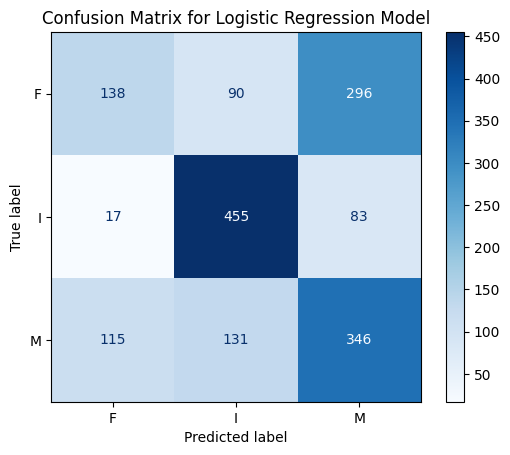

In [25]:
# Create the confusion matrix for logistic regression model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix as a plot
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
